# File and function stats

In [1]:
# import the pandas data analysis library and matplotlib
import json
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

n_sketches_created = 14542
n_sketches_hearted = 14196
n_sketches_total = n_sketches_created + n_sketches_hearted

In [2]:
def load_json(filename):
    with open(filename, encoding="utf8") as f:
        data = json.load(f)
    return data

In [3]:
def scatter_plot(df, var_name, title, ticks=[]):
    data = df[var_name]
    mean = df[var_name].mean()
    std = df[var_name].std()
    min_value = min(data)
    max_value = max(data)
    
    plt.title(title)
    plt.scatter(x=df.index, y=df[var_name], s=0.5)
    plt.hlines(y=mean, xmin=0, xmax=len(data),  colors='y')
    
    if std > 0:
        if (mean - std) > min_value:
            plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')

        if (mean + std) < max_value:
            plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

        if (mean - 2*std) > min_value:
            plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')

        if (mean + 2*std) < max_value:
            plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')
            
    #hide x-axis
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    
    if ticks:
        plt.yticks(ticks)


    plt.show()

In [4]:
def scatter_plot_top_limit(df, var_name, title, limit, ticks=[]):
    data = df[var_name]
    mean = df[var_name].mean()
    std = df[var_name].std()
    min_value = min(data)
    max_value = max(data)
    
    ndata = df[ (df[var_name] < limit)][var_name]
    
    plt.title(title)
    plt.scatter(x=ndata.index, y=ndata, s=0.5)
    plt.hlines(y=mean, xmin=0, xmax=len(data),  colors='y')
    
    if std > 0:
        if (mean - std) > min_value:
            plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')

        if (mean + std) < limit:
            plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

        if (mean - 2*std) > min_value:
            plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')

        if (mean + 2*std) < limit:
            plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')
    
    #hide x-axis
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    
    if ticks:
        plt.yticks(ticks)

    plt.show()

In [5]:
#df.loc[df['column_name'] == some_value]

## Count of sketches

In [6]:
stats_c = load_json("../analysis/cr/data_jsons/stats_created_joined.json")
sketches_c = len(stats_c["sketches"])
set_draw_c = stats_c["files_setup_draw"]
files_c = stats_c["n_files"]

print((set_draw_c/files_c) * 100)
print((set_draw_c/sketches_c) * 100)

73.61145807311183
91.3884007029877


In [7]:
stats_h = load_json("../analysis/cr/data_jsons/stats_hearted_joined.json")
sketches_h = len(stats_h["sketches"])
set_draw_h = stats_h["files_setup_draw"]
files_h = stats_h["n_files"]

print((set_draw_h/files_h) * 100)
print((set_draw_h/sketches_h) * 100)

65.9259899706035
90.62277157119087


In [8]:
stats_t = load_json("../analysis/cr/data_jsons/stats_total_joined.json")
sketches_t = len(stats_t["sketches"])
set_draw_t = stats_t["files_setup_draw"]
files_t = stats_t["n_files"]

print((set_draw_t/files_t) * 100)
print((set_draw_t/sketches_t) * 100)

69.84093319194061
91.1279610360859


## Project, File, Func counter

### Created

In [9]:
counter_created = load_json("../analysis/cr/jsons/created_project_file_func_count.json")

In [10]:
df_funcs_per_project_created = pd.DataFrame(counter_created['funcs_per_project'], columns=["funcs_per_project"])
df_funcs_per_project_created

,funcs_per_project
0,2
1,25
2,2
3,3
4,5
...,...
9668,3
9669,7
9670,2
9671,3


In [11]:
df_funcs_per_project_created.describe().round(2)

,funcs_per_project
count,9673.00
mean,4.67
std,35.14
min,0.00
25%,2.00
50%,2.00
75%,4.00
max,2591.00


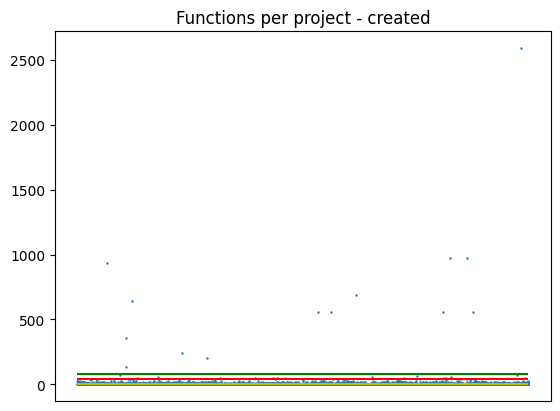

In [99]:
scatter_plot(df_funcs_per_project_created, 'funcs_per_project', "Functions per project - created")

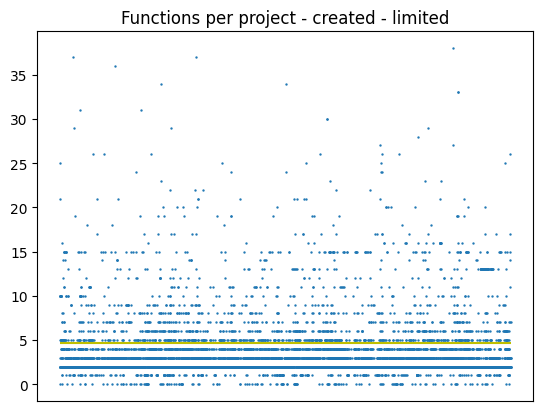

In [100]:
scatter_plot_top_limit(df_funcs_per_project_created, 'funcs_per_project', "Functions per project - created - limited", limit=round(df_funcs_per_project_created["funcs_per_project"].quantile(0.75) + df_funcs_per_project_created["funcs_per_project"].std()))

In [13]:
df_funcs_per_file_created = pd.DataFrame(counter_created['funcs_per_file'], columns=["funcs_per_file"])
df_funcs_per_file_created

,funcs_per_file
0,2
1,19
2,6
3,0
4,2
...,...
12004,3
12005,7
12006,2
12007,3


In [14]:
df_funcs_per_file_created.describe().round(2)

,funcs_per_file
count,12009.00
mean,3.76
std,27.24
min,0.00
25%,2.00
50%,2.00
75%,3.00
max,1916.00


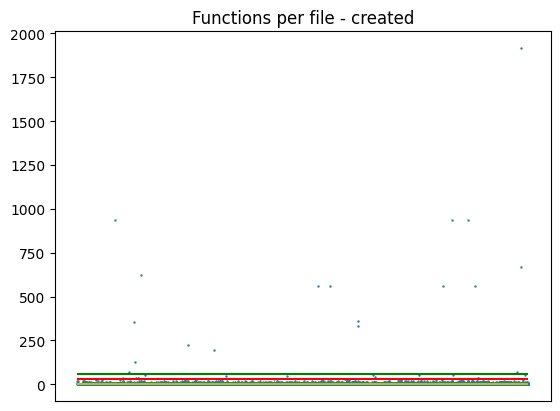

In [101]:
scatter_plot(df_funcs_per_file_created, 'funcs_per_file', "Functions per file - created")

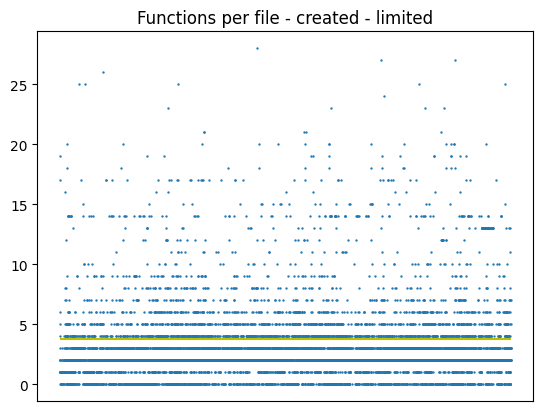

In [102]:
scatter_plot_top_limit(df_funcs_per_file_created, 'funcs_per_file', "Functions per file - created - limited", limit=round(df_funcs_per_file_created["funcs_per_file"].quantile(0.75) + df_funcs_per_file_created["funcs_per_file"].std()))

In [16]:
df_files_per_project_created = pd.DataFrame(counter_created['files_per_project'], columns=["files_per_project"])
df_files_per_project_created

,files_per_project
0,1
1,3
2,1
3,1
4,1
...,...
9668,1
9669,1
9670,1
9671,1


In [17]:
df_files_per_project_created.describe().round(2)

,files_per_project
count,9673.00
mean,1.24
std,1.03
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,14.00


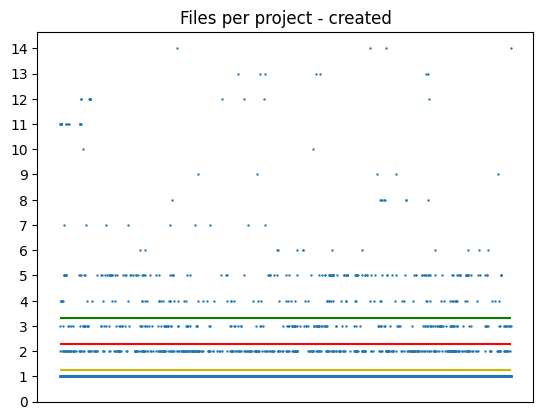

In [79]:
scatter_plot(df_files_per_project_created, 'files_per_project', "Files per project - created", ticks=list(range(0,15)))

### Hearted

In [103]:
counter_hearted = load_json("../analysis/cr/jsons/hearted_project_file_func_count.json")

In [104]:
df_funcs_per_project_hearted = pd.DataFrame(counter_hearted['funcs_per_project'], columns=["funcs_per_project"])
df_funcs_per_project_hearted

,funcs_per_project
0,10
1,3
2,40
3,4
4,7
...,...
8409,4
8410,6
8411,11
8412,5


In [21]:
df_funcs_per_project_hearted.describe().round(2)

,funcs_per_project
count,8414.00
mean,9.28
std,74.65
min,0.00
25%,3.00
50%,4.00
75%,6.00
max,4202.00


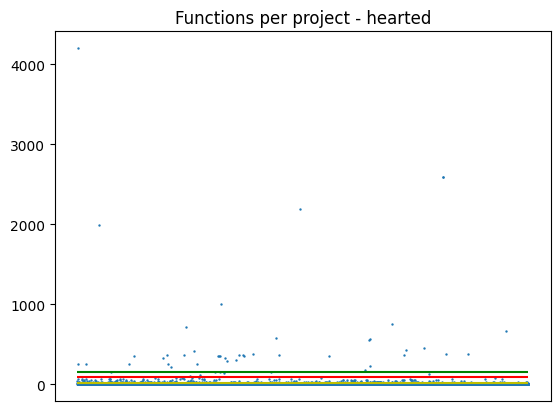

In [105]:
scatter_plot(df_funcs_per_project_hearted, 'funcs_per_project', "Functions per project - hearted")

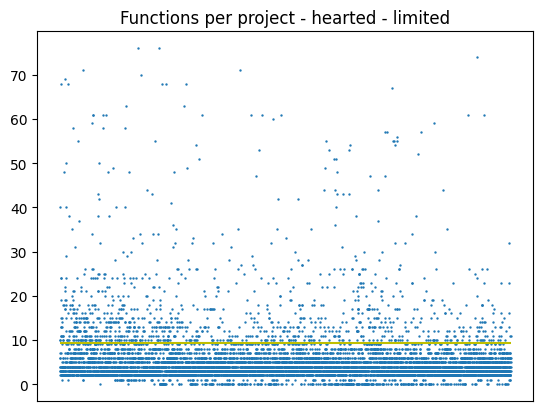

In [106]:
scatter_plot_top_limit(df_funcs_per_project_hearted, 'funcs_per_project', "Functions per project - hearted - limited", limit=round(df_funcs_per_project_hearted["funcs_per_project"].quantile(0.75) + df_funcs_per_project_hearted["funcs_per_project"].std()))

In [107]:
df_funcs_per_file_hearted = pd.DataFrame(counter_hearted['funcs_per_file'], columns=["funcs_per_file"])
df_funcs_per_file_hearted

,funcs_per_file
0,10
1,3
2,8
3,32
4,4
...,...
11561,8
11562,1
11563,1
11564,3


In [24]:
df_funcs_per_file_hearted.describe().round(2)

,funcs_per_file
count,11566.00
mean,6.75
std,49.99
min,0.00
25%,2.00
50%,3.00
75%,5.00
max,2196.00


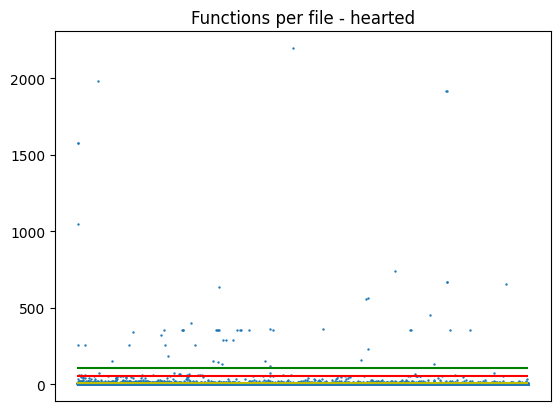

In [108]:
scatter_plot(df_funcs_per_file_hearted, 'funcs_per_file', "Functions per file - hearted")

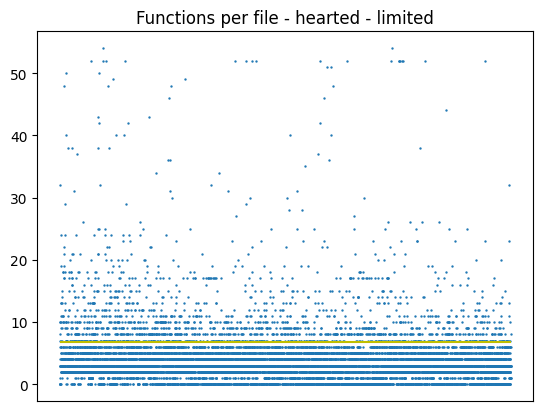

In [110]:
scatter_plot_top_limit(df_funcs_per_file_hearted, 'funcs_per_file', "Functions per file - hearted - limited", limit=round(df_funcs_per_file_hearted["funcs_per_file"].quantile(0.75) + df_funcs_per_file_hearted["funcs_per_file"].std()))

In [26]:
df_files_per_project_hearted = pd.DataFrame(counter_hearted['files_per_project'], columns=["files_per_project"])
df_files_per_project_hearted

,files_per_project
0,1
1,1
2,2
3,1
4,2
...,...
8409,1
8410,1
8411,2
8412,3


In [27]:
df_files_per_project_hearted.describe().round(2)

,files_per_project
count,8414.00
mean,1.37
std,1.13
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,19.00


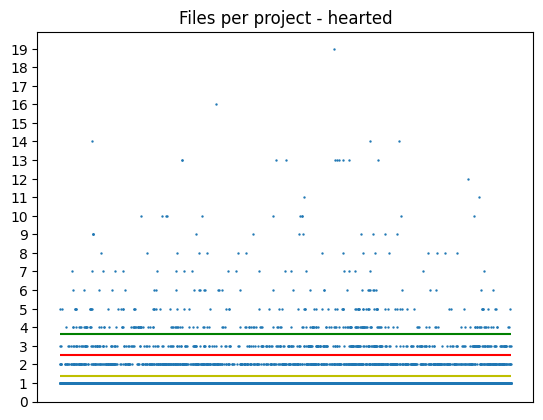

In [80]:
scatter_plot(df_files_per_project_hearted, 'files_per_project', "Files per project - hearted", ticks=list(range(0,20)))

### Total

In [29]:
counter_total = load_json("../analysis/cr/jsons/total_project_file_func_count.json")

In [30]:
df_funcs_per_project_total = pd.DataFrame(counter_total['funcs_per_project'], columns=["funcs_per_project"])
df_funcs_per_project_total

,funcs_per_project
0,2
1,25
2,2
3,3
4,5
...,...
18063,4
18064,6
18065,11
18066,5


In [31]:
df_funcs_per_project_total.describe().round(2)

,funcs_per_project
count,18068.00
mean,6.81
std,57.11
min,0.00
25%,2.00
50%,3.00
75%,5.00
max,4202.00


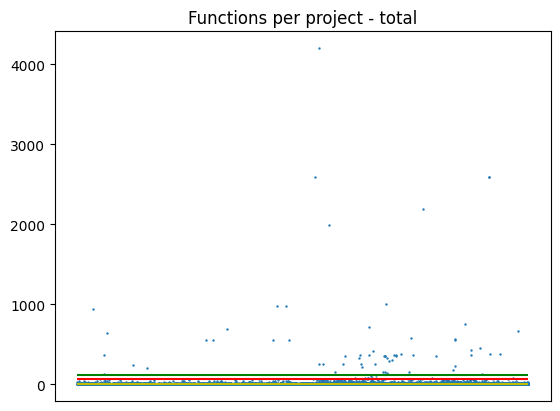

In [112]:
scatter_plot(df_funcs_per_project_total, 'funcs_per_project', "Functions per project - total")

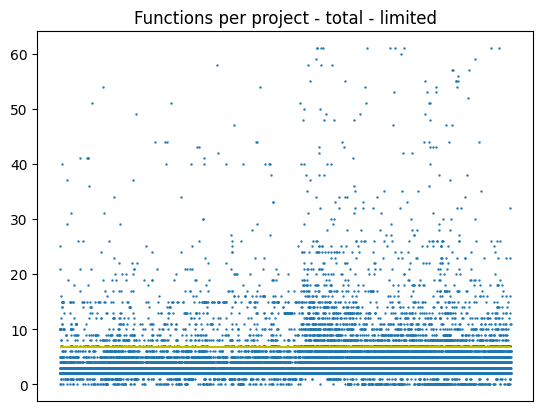

In [113]:
scatter_plot_top_limit(df_funcs_per_project_total, 'funcs_per_project', "Functions per project - total - limited", limit=round(df_funcs_per_project_total["funcs_per_project"].quantile(0.75) + df_funcs_per_project_total["funcs_per_project"].std()))

In [34]:
df_funcs_per_file_total= pd.DataFrame(counter_total['funcs_per_file'], columns=["funcs_per_file"])
df_funcs_per_file_total

,funcs_per_file
0,2
1,19
2,6
3,0
4,2
...,...
23544,8
23545,1
23546,1
23547,3


In [35]:
df_funcs_per_file_total.describe().round(2)

,funcs_per_file
count,23549.00
mean,5.22
std,40.10
min,0.00
25%,2.00
50%,3.00
75%,4.00
max,2196.00


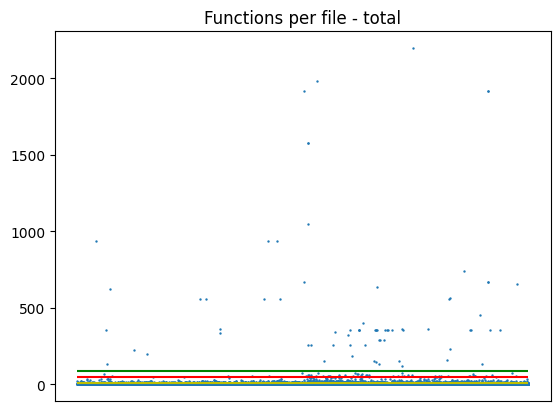

In [114]:
scatter_plot(df_funcs_per_file_total, 'funcs_per_file', "Functions per file - total")

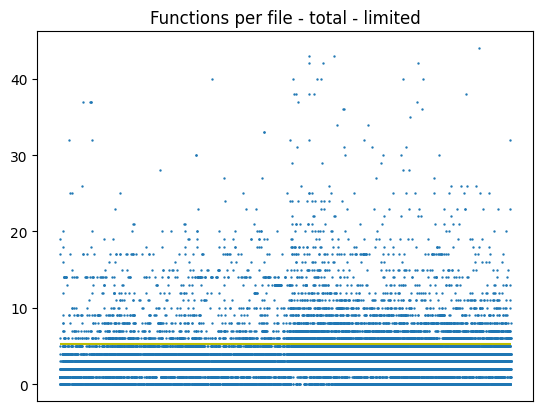

In [115]:
scatter_plot_top_limit(df_funcs_per_file_total, 'funcs_per_file', "Functions per file - total - limited", limit=ceil(df_funcs_per_file_total["funcs_per_file"].quantile(0.75) + df_funcs_per_file_total["funcs_per_file"].std()))

In [38]:
df_files_per_project_total = pd.DataFrame(counter_total['files_per_project'], columns=["files_per_project"])
df_files_per_project_total

,files_per_project
0,1
1,3
2,1
3,1
4,1
...,...
18063,1
18064,1
18065,2
18066,3


In [39]:
df_files_per_project_total.describe().round(2)

,files_per_project
count,18068.00
mean,1.30
std,1.08
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,19.00


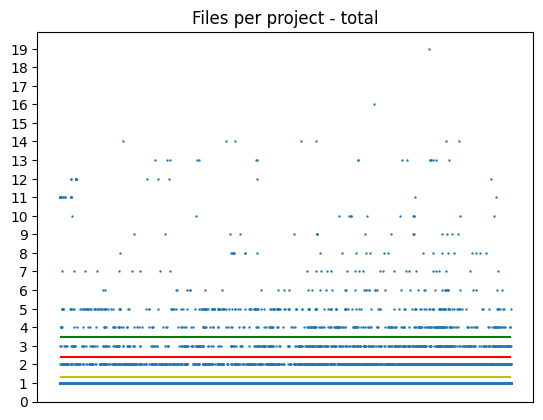

In [77]:
scatter_plot(df_files_per_project_total, 'files_per_project', "Files per project - total", ticks=list(range(0,20)))

## Func Names

In [132]:
def get_lens(list):
    for elem in list:
        print(len(elem))

### Created

In [41]:
cc_created = load_json("../analysis/cr/jsons/created_func_name_counters.json")

In [151]:
len({k: v for k, v in cc_created["name_counts"].items() if v > 10}) ##jugar con el v>...

name_counts_filtered_over_1_created = {k: v for k, v in cc_created["name_counts"].items() if v > 1}
name_counts_filtered_over_10_created = {k: v for k, v in cc_created["name_counts"].items() if v > 10}
name_counts_filtered_over_50_created = {k: v for k, v in cc_created["name_counts"].items() if v > 50}
name_counts_filtered_over_100_created = {k: v for k, v in cc_created["name_counts"].items() if v > 100}
name_counts_filtered_over_500_created = {k: v for k, v in cc_created["name_counts"].items() if v > 500}
name_counts_filtered_over_1000_created = {k: v for k, v in cc_created["name_counts"].items() if v > 1000}
name_counts_filtered_over_5000_created = {k: v for k, v in cc_created["name_counts"].items() if v > 5000}

len(cc_created["name_counts"])

6972

In [152]:
get_lens([cc_created["name_counts"], name_counts_filtered_over_1_created, name_counts_filtered_over_10_created, name_counts_filtered_over_50_created, name_counts_filtered_over_100_created, name_counts_filtered_over_500_created, name_counts_filtered_over_1000_created, name_counts_filtered_over_5000_created])

6972
2714
200
36
16
6
5
2


In [153]:
sorted_func_counts_created = dict(sorted(cc_created["name_counts"].items(), key=lambda x:x[1], reverse=True))
sorted_func_counts_created

{'setup': 9439,
 'draw': 8941,
 '<anonymous>': 4111,
 'preload': 1342,
 'mousePressed': 1037,
 'keyPressed': 781,
 '<anonymous>.show': 322,
 'mouseClicked': 264,
 'get': 214,
 'Score': 190,
 'keyTyped': 176,
 'e': 150,
 'mouseReleased': 148,
 'set': 127,
 'windowResized': 122,
 '<anonymous>.update': 119,
 '<anonymous>.move': 93,
 'Star': 87,
 'copyToClipboard': 87,
 'setRandom': 86,
 'setFont': 86,
 'setEliminatedFont': 86,
 'setCreditFont': 86,
 'shortenNumber': 86,
 '<anonymous>.display': 85,
 'easingConfig': 84,
 't': 83,
 'mouseDragged': 73,
 'keyReleased': 69,
 'f': 62,
 '<anonymous>.draw': 60,
 'Particle': 58,
 'n': 58,
 'l': 57,
 'y': 53,
 'r.a': 51,
 'c': 49,
 'd': 49,
 'star': 48,
 'reset': 47,
 'a': 43,
 'b': 43,
 'i': 42,
 'mouseMoved': 41,
 'makeFilter': 38,
 'r': 38,
 'o': 38,
 'u': 36,
 'init': 35,
 'initialize': 35,
 'ball': 33,
 'prop': 33,
 'g': 33,
 'cloud': 32,
 'makeTriangle': 32,
 'm': 32,
 'back0': 31,
 'back3': 31,
 'drawOverPattern': 31,
 'divideOP': 31,
 'move'

### Hearted

In [46]:
cc_hearted = load_json("../analysis/cr/jsons/hearted_func_name_counters.json")

In [154]:
len({k: v for k, v in cc_hearted["name_counts"].items() if v > 10}) ##jugar con el v>...

name_counts_filtered_over_1_hearted = {k: v for k, v in cc_hearted["name_counts"].items() if v > 1}
name_counts_filtered_over_10_hearted = {k: v for k, v in cc_hearted["name_counts"].items() if v > 10}
name_counts_filtered_over_50_hearted = {k: v for k, v in cc_hearted["name_counts"].items() if v > 50}
name_counts_filtered_over_100_hearted = {k: v for k, v in cc_hearted["name_counts"].items() if v > 100}
name_counts_filtered_over_500_hearted = {k: v for k, v in cc_hearted["name_counts"].items() if v > 500}
name_counts_filtered_over_1000_hearted = {k: v for k, v in cc_hearted["name_counts"].items() if v > 1000}
name_counts_filtered_over_5000_hearted = {k: v for k, v in cc_hearted["name_counts"].items() if v > 5000}

len(cc_hearted["name_counts"])

16719

In [155]:
get_lens([cc_hearted["name_counts"], name_counts_filtered_over_1_hearted, name_counts_filtered_over_10_hearted, name_counts_filtered_over_50_hearted, name_counts_filtered_over_100_hearted, name_counts_filtered_over_500_hearted, name_counts_filtered_over_1000_hearted, name_counts_filtered_over_5000_hearted])

16719
6826
490
72
38
10
7
3


In [156]:
sorted_func_counts_hearted = dict(sorted(cc_hearted["name_counts"].items(), key=lambda x:x[1], reverse=True))
sorted_func_counts_hearted

{'setup': 7978,
 'draw': 7708,
 '<anonymous>': 7503,
 'preload': 1697,
 'mousePressed': 1346,
 'keyPressed': 1053,
 'value': 1053,
 '<anonymous>.update': 584,
 'get': 578,
 '<anonymous>.display': 520,
 '<anonymous>.move': 379,
 'keyTyped': 332,
 'mouseClicked': 325,
 '<anonymous>.show': 320,
 'mouseReleased': 305,
 'Particle': 302,
 'run': 294,
 'windowResized': 267,
 '<anonymous>.draw': 246,
 'e': 229,
 'set': 224,
 'mouseDragged': 205,
 'init': 184,
 't': 171,
 'separateGrid': 163,
 'createCols': 152,
 'mouseMoved': 138,
 'keyReleased': 136,
 'o.create': 136,
 'i': 128,
 'reset': 125,
 'n': 125,
 'createPalette': 125,
 '<anonymous>.toString': 123,
 'c': 113,
 'd': 107,
 'o': 103,
 '<anonymous>.reset': 101,
 'read': 100,
 'a': 97,
 '<anonymous>.run': 97,
 'update': 93,
 '<anonymous>.render': 91,
 'toString': 87,
 'mouseWheel': 84,
 's': 84,
 'generate': 84,
 'b': 78,
 '<anonymous>.init': 77,
 'makeFilter': 77,
 'f': 76,
 'r': 76,
 'createPallete': 76,
 'h': 72,
 'generateColor': 72,
 

### Total

In [50]:
cc_total = load_json("../analysis/cr/jsons/total_func_name_counters.json")

In [161]:
len({k: v for k, v in cc_hearted["name_counts"].items() if v > 10}) ##jugar con el v>...

name_counts_filtered_over_1_total = {k: v for k, v in cc_total["name_counts"].items() if v > 1}
name_counts_filtered_over_10_total = {k: v for k, v in cc_total["name_counts"].items() if v > 10}
name_counts_filtered_over_50_total = {k: v for k, v in cc_total["name_counts"].items() if v > 50}
name_counts_filtered_over_100_total = {k: v for k, v in cc_total["name_counts"].items() if v > 100}
name_counts_filtered_over_500_total = {k: v for k, v in cc_total["name_counts"].items() if v > 500}
name_counts_filtered_over_1000_total = {k: v for k, v in cc_total["name_counts"].items() if v > 1000}
name_counts_filtered_over_5000_total = {k: v for k, v in cc_total["name_counts"].items() if v > 5000}

len(cc_total["name_counts"])

19818

In [158]:
get_lens([cc_total["name_counts"], name_counts_filtered_over_1_total, name_counts_filtered_over_10_total, name_counts_filtered_over_50_total, name_counts_filtered_over_100_total, name_counts_filtered_over_500_total, name_counts_filtered_over_1000_total, name_counts_filtered_over_5000_total])

19818
8278
1064
103
55
13
7
3


In [159]:
sorted_func_counts_total = dict(sorted(cc_total["name_counts"].items(), key=lambda x:x[1], reverse=True))
sorted_func_counts_total

{'setup': 17417,
 'draw': 16649,
 '<anonymous>': 11614,
 'preload': 3039,
 'mousePressed': 2383,
 'keyPressed': 1834,
 'value': 1065,
 'get': 792,
 '<anonymous>.update': 703,
 '<anonymous>.show': 642,
 '<anonymous>.display': 605,
 'mouseClicked': 589,
 'keyTyped': 508,
 '<anonymous>.move': 472,
 'mouseReleased': 453,
 'windowResized': 389,
 'e': 379,
 'Particle': 360,
 'set': 351,
 '<anonymous>.draw': 306,
 'run': 295,
 'mouseDragged': 278,
 't': 254,
 'init': 219,
 'keyReleased': 205,
 'Score': 205,
 'n': 183,
 'createCols': 181,
 'mouseMoved': 179,
 'separateGrid': 173,
 'reset': 172,
 'i': 170,
 'c': 162,
 'd': 156,
 'o': 141,
 'a': 140,
 'f': 138,
 'o.create': 136,
 '<anonymous>.reset': 128,
 'createPalette': 128,
 '<anonymous>.toString': 127,
 'b': 121,
 'update': 120,
 '<anonymous>.run': 115,
 'Star': 115,
 'makeFilter': 115,
 's': 115,
 'r': 114,
 'mouseWheel': 112,
 'l': 109,
 '<anonymous>.render': 107,
 'generate': 106,
 'toString': 103,
 'h': 101,
 'read': 101,
 'generateColo

## Characterization of setup and draw

### Created

In [54]:
characterization_created = load_json("../analysis/cr/jsons/created_setup_draw_characterization.json")
c_setup_created = {k: v for k, v in characterization_created.items() if "setup" in k}
c_draw_created = {k: v for k, v in characterization_created.items() if "draw" in k}

#### setup

In [55]:
df_c_setup_created = pd.DataFrame.from_dict(c_setup_created)
df_c_setup_created

,params_setup,loc_logical_setup,loc_physical_setup
0,0,6,9
1,0,2,4
2,0,8,12
3,0,7,10
4,0,11,13
...,...,...,...
9434,0,18,28
9435,0,3,5
9436,0,40,57
9437,0,5,7


In [56]:
df_c_setup_created.describe().round(2)

,params_setup,loc_logical_setup,loc_physical_setup
count,9439.00,9439.00,9439.00
mean,0.00,10.49,12.72
std,0.01,141.19,43.88
min,0.00,0.00,1.00
25%,0.00,2.00,4.00
50%,0.00,3.00,5.00
75%,0.00,7.00,11.00
max,1.00,13465.00,3546.00


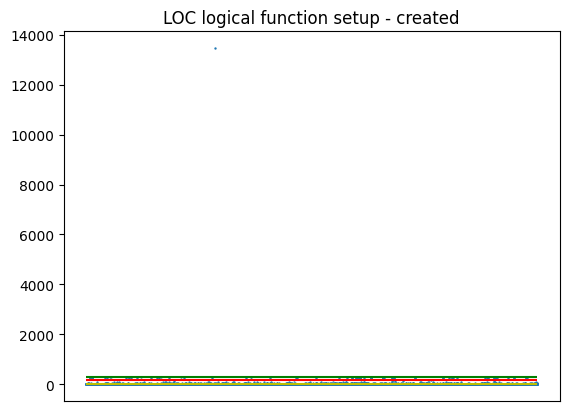

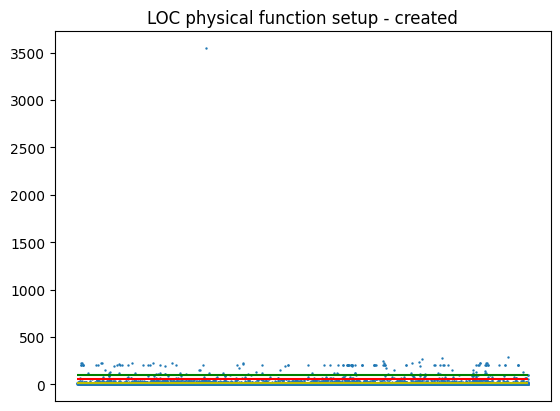

In [57]:
scatter_plot(df_c_setup_created, 'loc_logical_setup', "LOC logical function setup - created")
scatter_plot(df_c_setup_created, 'loc_physical_setup', "LOC physical function setup - created")

#### Draw

In [58]:
df_c_draw_created = pd.DataFrame.from_dict(c_draw_created)
df_c_draw_created

,params_draw,loc_logical_draw,loc_physical_draw
0,0,1,9
1,0,36,51
2,0,16,20
3,0,14,18
4,0,16,28
...,...,...,...
8936,0,81,112
8937,0,2,4
8938,0,4,6
8939,0,12,40


In [59]:
df_c_draw_created.describe().round(2)

,params_draw,loc_logical_draw,loc_physical_draw
count,8941.00,8941.00,8941.00
mean,0.00,26.05,36.32
std,0.02,116.03,132.05
min,0.00,0.00,1.00
25%,0.00,5.00,8.00
50%,0.00,10.00,17.00
75%,0.00,23.00,35.00
max,2.00,5714.00,6588.00


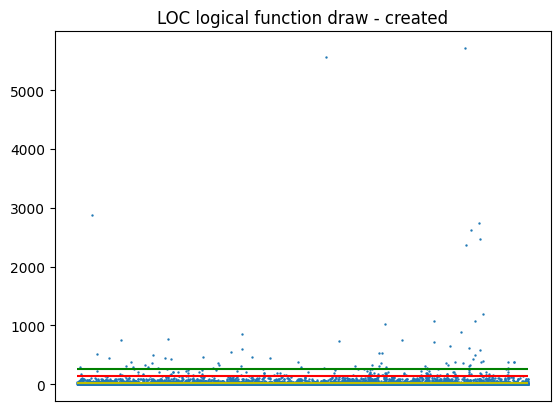

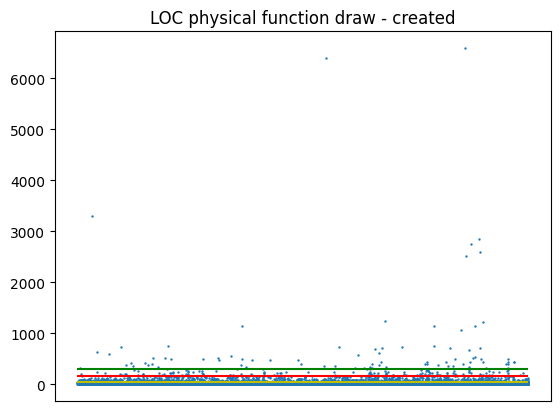

In [60]:
scatter_plot(df_c_draw_created, 'loc_logical_draw', "LOC logical function draw - created")
scatter_plot(df_c_draw_created, 'loc_physical_draw', "LOC physical function draw - created")

### Hearted

In [61]:
characterization_hearted = load_json("../analysis/cr/jsons/hearted_setup_draw_characterization.json")
c_setup_hearted = {k: v for k, v in characterization_hearted.items() if "setup" in k}
c_draw_hearted = {k: v for k, v in characterization_hearted.items() if "draw" in k}

#### setup

In [62]:
df_c_setup_hearted = pd.DataFrame.from_dict(c_setup_hearted)
df_c_setup_hearted

,params_setup,loc_logical_setup,loc_physical_setup
0,0,5,7
1,0,2,4
2,0,26,42
3,0,18,28
4,0,15,17
...,...,...,...
7973,0,5,8
7974,0,11,14
7975,0,2,4
7976,0,8,38


In [63]:
df_c_setup_hearted.describe().round(2)

,params_setup,loc_logical_setup,loc_physical_setup
count,7978.00,7978.00,7978.00
mean,0.00,11.33,16.71
std,0.03,45.54,48.89
min,0.00,0.00,1.00
25%,0.00,4.00,6.00
50%,0.00,7.00,11.00
75%,0.00,13.00,18.00
max,1.00,3755.00,3819.00


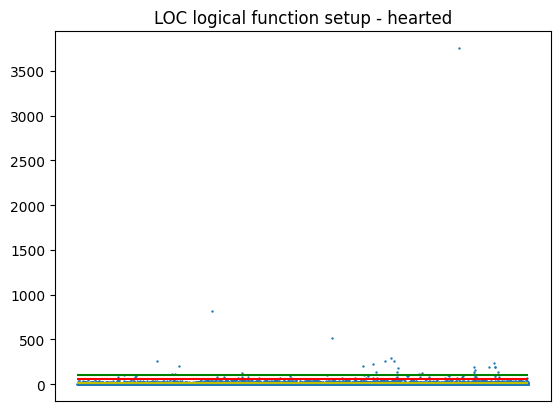

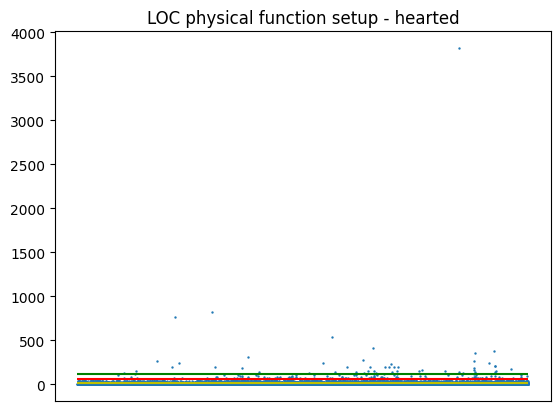

In [64]:
scatter_plot(df_c_setup_hearted, 'loc_logical_setup', "LOC logical function setup - hearted")
scatter_plot(df_c_setup_hearted, 'loc_physical_setup', "LOC physical function setup - hearted")

#### draw

In [65]:
df_c_draw_hearted = pd.DataFrame.from_dict(c_draw_hearted)
df_c_draw_hearted

,params_draw,loc_logical_draw,loc_physical_draw
0,0,4,6
1,0,24,35
2,0,80,134
3,0,8,15
4,0,14,20
...,...,...,...
7703,0,24,38
7704,0,0,6
7705,0,5,9
7706,0,13,15


In [66]:
df_c_draw_hearted.describe().round(2)

,params_draw,loc_logical_draw,loc_physical_draw
count,7708.00,7708.00,7708.00
mean,0.01,22.36,32.55
std,0.20,51.90,54.73
min,0.00,0.00,1.00
25%,0.00,6.00,11.00
50%,0.00,14.00,21.00
75%,0.00,25.00,36.00
max,4.00,1985.00,1533.00


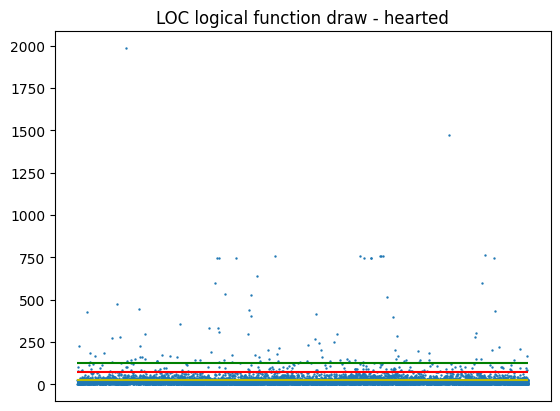

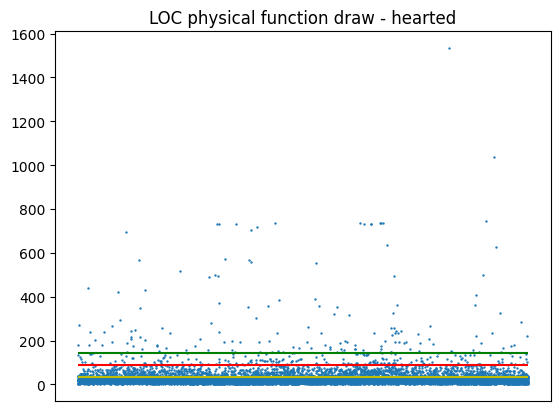

In [67]:
scatter_plot(df_c_draw_hearted, 'loc_logical_draw', "LOC logical function draw - hearted")
scatter_plot(df_c_draw_hearted, 'loc_physical_draw', "LOC physical function draw - hearted")

### Total

In [68]:
characterization_total = load_json("../analysis/cr/jsons/total_setup_draw_characterization.json")
c_setup_total = {k: v for k, v in characterization_total.items() if "setup" in k}
c_draw_total = {k: v for k, v in characterization_total.items() if "draw" in k}

#### setup

In [69]:
df_c_setup_total = pd.DataFrame.from_dict(c_setup_total)
df_c_setup_total

,params_setup,loc_logical_setup,loc_physical_setup
0,0,6,9
1,0,2,4
2,0,8,12
3,0,7,10
4,0,11,13
...,...,...,...
17412,0,5,8
17413,0,11,14
17414,0,2,4
17415,0,8,38


In [70]:
df_c_setup_total.describe().round(2)

,params_setup,loc_logical_setup,loc_physical_setup
count,17417.00,17417.00,17417.00
mean,0.00,10.88,14.55
std,0.02,108.41,46.29
min,0.00,0.00,1.00
25%,0.00,2.00,4.00
50%,0.00,5.00,8.00
75%,0.00,10.00,15.00
max,1.00,13465.00,3819.00


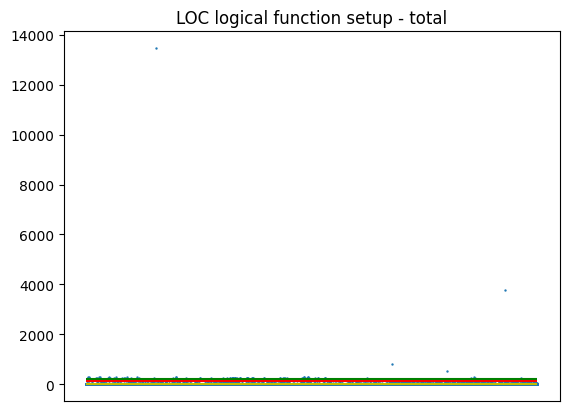

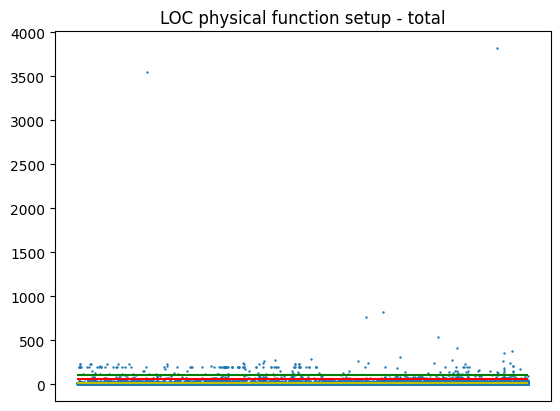

In [71]:
scatter_plot(df_c_setup_total, 'loc_logical_setup', "LOC logical function setup - total")
scatter_plot(df_c_setup_total, 'loc_physical_setup', "LOC physical function setup - total")

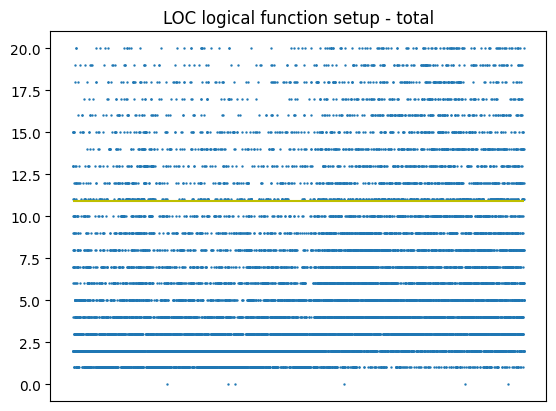

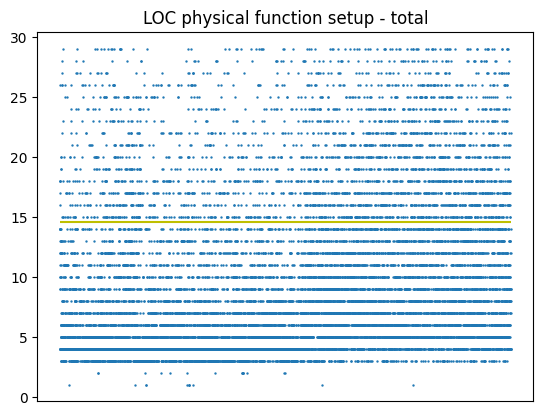

In [72]:
scatter_plot_top_limit(df_c_setup_total, 'loc_logical_setup', "LOC logical function setup - total", limit=df_c_setup_total["loc_logical_setup"].quantile(0.75) + df_c_setup_total["loc_logical_setup"].mean().round(2))
scatter_plot_top_limit(df_c_setup_total, 'loc_physical_setup', "LOC physical function setup - total", limit=df_c_setup_total["loc_physical_setup"].quantile(0.75) + df_c_setup_total["loc_physical_setup"].mean().round(2))

#### draw

In [73]:
df_c_draw_total = pd.DataFrame.from_dict(c_draw_total)
df_c_draw_total

,params_draw,loc_logical_draw,loc_physical_draw
0,0,1,9
1,0,36,51
2,0,16,20
3,0,14,18
4,0,16,28
...,...,...,...
16644,0,24,38
16645,0,0,6
16646,0,5,9
16647,0,13,15


In [74]:
df_c_draw_total.describe().round(2)

,params_draw,loc_logical_draw,loc_physical_draw
count,16649.00,16649.00,16649.00
mean,0.01,24.34,34.57
std,0.14,92.09,103.70
min,0.00,0.00,1.00
25%,0.00,5.00,9.00
50%,0.00,12.00,19.00
75%,0.00,24.00,35.00
max,4.00,5714.00,6588.00


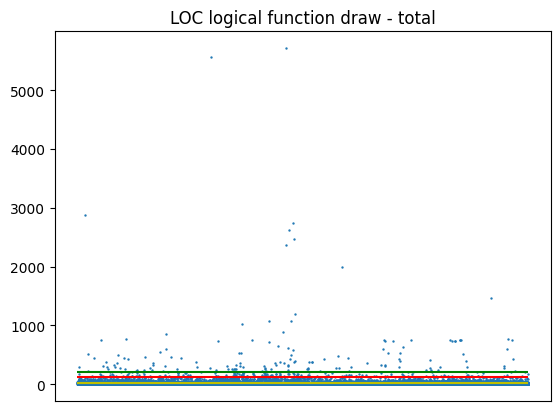

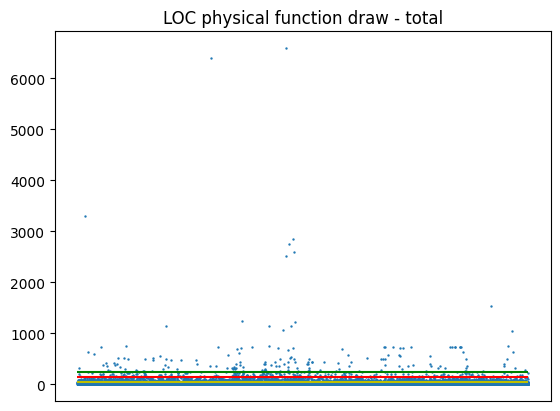

In [75]:
scatter_plot(df_c_draw_total, 'loc_logical_draw', "LOC logical function draw - total")
scatter_plot(df_c_draw_total, 'loc_physical_draw', "LOC physical function draw - total")

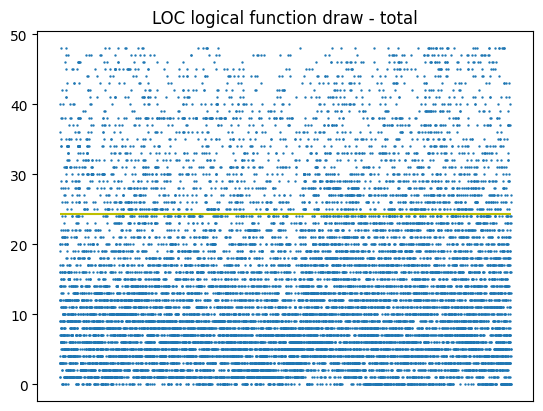

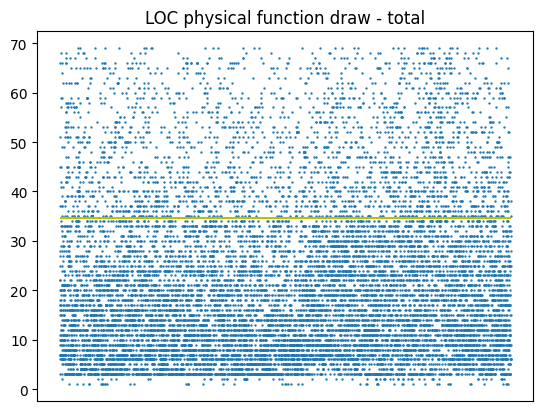

In [76]:
scatter_plot_top_limit(df_c_draw_total, 'loc_logical_draw', "LOC logical function draw - total", limit=df_c_draw_total["loc_logical_draw"].quantile(0.75) + df_c_draw_total["loc_logical_draw"].mean().round(2))
scatter_plot_top_limit(df_c_draw_total, 'loc_physical_draw', "LOC physical function draw - total", limit=df_c_draw_total["loc_physical_draw"].quantile(0.75) + df_c_draw_total["loc_physical_draw"].mean().round(2))